# DPCM Card Game Simulator

## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import ast

### Variables

In [6]:
purple = '#7f00ff'
orange = '#ff4500'

### Analysis

In [ ]:
results_df = pd.read_csv('../data/results.csv')

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

n, bins, patches = plt.hist(results_df['Turns'], bins=np.arange(0, max(results_df['Turns']), 5), color=purple, edgecolor='w')

x = range(max(results_df['Turns']))
plt.xticks(np.arange(min(x), max(x)+10, 5))

n = list(n)
patches[n.index(max(n))].set_fc(orange)

plt.xlabel('Turns per Game')
plt.ylabel('Number of games')

plt.title('Turns Distribution')

plt.show()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

not_fair_file = 'not_fair.csv'
fair_file = 'fair.csv'

not_fair_df = pd.read_csv('../data/' + not_fair_file)
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(not_fair_df.index, not_fair_df['Rate'], color = orange, label='Win-Rate not fair')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Win-Rate fair')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(not_fair_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Human VS AI

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

fair_file = 'fair.csv'
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(results_df.index, results_df['Rate'], color = orange, label='AI')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Human')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(results_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Visits

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df['MAX'] = visited_df.iloc[:, 1:].max(axis=1)
visited_df['HAND'] = visited_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
visited_pivot = visited_df.drop(columns='MAX').iloc[:, 1:].groupby('HAND').sum()
visited_pivot = visited_pivot.replace(0, np.NaN)

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(visited_pivot, 
            fmt='.0f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Exploration

In [ ]:
visits_df = pd.read_csv('../data/visits.csv')

In [ ]:
visits_df.head()

In [ ]:
visits_df['Cumsum'] = visits_df['Visits'].cumsum()

In [ ]:
visits_df.head()

In [ ]:
fig = plt.figure(1, figsize=(10, 10))

x = np.linspace(0, max(visits_df.index))
y = x

plt.plot(visits_df.index, visits_df['Cumsum'], color = orange, label='Coverage')
plt.plot(x, y, color = 'black', label='Linear', linestyle='--')

plt.title('State/Move Coverage')

plt.legend(loc='lower right')

plt.xlabel('Turns of games')
plt.ylabel('State/Move Pairs Visited')

plt.show()

### Cards Playable

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df.head()

In [ ]:
visited_df['VISITS'] = visited_df.iloc[:, 1:].max(axis=1)

In [ ]:
visited_filtered_df = visited_df[visited_df['VISITS'] > 0]

In [ ]:
visited_filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
visited_filtered_df.head()

In [ ]:
print(len(visited_df), len(visited_filtered_df), str(round(len(visited_filtered_df)*100/len(visited_df), 2)) + '%')

In [ ]:
state_max_df = visited_filtered_df[['ID', 'VISITS']].copy()

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['ID'] = state_max_df['ID'].apply(ast.literal_eval)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['ID'].apply(lambda x: x[3:])

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['HAND'].apply(lambda x: sum(x))

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('ID', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = pd.DataFrame(state_max_df.groupby('HAND')['VISITS'].sum())

In [ ]:
state_max_df.reset_index(drop=False, inplace=True)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['PERCENTAGE'] = round((state_max_df['VISITS'] / state_max_df['VISITS'].sum())*100, 2)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('VISITS', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

barra_piu_alta = state_max_df.loc[state_max_df['PERCENTAGE'].idxmax()]

plt.bar(state_max_df['HAND'], state_max_df['PERCENTAGE'], color=purple, edgecolor='w')
plt.bar(barra_piu_alta['HAND'], barra_piu_alta['PERCENTAGE'], color=orange)

plt.xticks(state_max_df['HAND'])

plt.xlabel('Cards in hand')
plt.ylabel('Occurences %')

plt.title('Quantity of playable Cards')

plt.show()

#### Q-Values

In [ ]:
q_df = pd.read_csv('../data/q.csv')

In [ ]:
q_df['MAX'] = q_df.iloc[:, 1:].max(axis=1)

In [ ]:
q_df['HAND'] = q_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
q_curve = q_df.copy()

In [ ]:
q_curve[['HAND', 'MAX']] = q_curve[['HAND', 'MAX']].replace(0, np.NaN)

q_mean = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').mean()['MAX'])
q_max  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').max()['MAX'])
q_std  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').std()['MAX']) / 2

In [ ]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(q_mean.index, q_mean, label='Mean', marker='o', color=purple)
plt.plot(q_max.index,  q_max,  label='Max',  marker='o', color=orange)

plt.fill_between(q_mean.index, q_mean - q_std, q_mean + q_std, alpha=1/5, color=purple, edgecolor=None)

plt.xticks(q_mean.index)

plt.xlabel('Number of Minimum Hand Cards')
plt.ylabel('Q-Value')

plt.title('Aggregated Q-Values')

plt.legend()

plt.show()

In [ ]:
q_pivot = q_df.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').iloc[:, 1:].groupby('HAND').mean()

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(q_pivot, 
            fmt='.2f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Strategy

In [141]:
state_seen_df = pd.read_csv('../data/state_seen.csv')

In [142]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]","[3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]"
1,"[1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]","[5, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]"
2,"[4, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]","[4, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,"[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]","[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,"[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [143]:
state_seen_df['Before'] = state_seen_df['Before'].apply(ast.literal_eval)
state_seen_df['After'] = state_seen_df['After'].apply(ast.literal_eval)

In [144]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]","[3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]"
1,"[1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]","[5, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]"
2,"[4, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]","[4, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,"[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]","[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,"[3, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [145]:
state_seen_df['Before'] = state_seen_df['Before'].apply(lambda x: x[3:11])
state_seen_df['After'] = state_seen_df['After'].apply(lambda x: x[3:11])

In [146]:
state_seen_df.head()

,Before,After
0,"[0, 0, 1, 0, 1, 0, 1, 0]","[0, 0, 1, 0, 1, 0, 1, 0]"
1,"[0, 0, 1, 1, 1, 0, 1, 1]","[0, 0, 1, 1, 0, 0, 1, 1]"
2,"[0, 0, 1, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 1, 0]"
3,"[1, 0, 1, 0, 0, 0, 1, 1]","[1, 0, 1, 0, 0, 0, 1, 0]"
4,"[1, 0, 1, 0, 0, 0, 1, 0]","[1, 0, 1, 0, 0, 0, 0, 0]"


In [147]:
state_seen_df = state_seen_df[state_seen_df['Before'] != state_seen_df['After']]

In [148]:
def funzione_complessa(riga):
    for idx, _ in enumerate(range(len(riga['Before']))):
        if riga['Before'][idx] >= riga['After'][idx]:
            continue
        else:
            return False
    return True
    
state_seen_df = state_seen_df[state_seen_df.apply(funzione_complessa, axis=1)]

In [149]:
def funzione_complessa2(riga):
    for idx in range(5, 8):
        if riga['Before'][idx] == 1:
            continue
        else:
            return False
    return True
    
state_seen_df = state_seen_df[state_seen_df.apply(funzione_complessa2, axis=1)]

In [150]:
state_seen_df.head()

,Before,After
46,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 1, 0, 0, 1, 0, 1]"
48,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 0, 0, 0, 1, 0, 1]"
63,"[0, 0, 1, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 1]"
91,"[0, 0, 1, 0, 0, 1, 1, 1]","[0, 0, 1, 0, 0, 1, 0, 1]"
93,"[0, 1, 0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 1]"


In [151]:
def trova_differenze(lista1, lista2):
    return [i for i, (elem1, elem2) in enumerate(zip(lista1, lista2)) if elem1 != elem2]

state_seen_df['indici_differenze'] = state_seen_df.apply(lambda row: trova_differenze(row['Before'], row['After']), axis=1)

In [152]:
state_seen_df.head()

,Before,After,indici_differenze
46,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 1, 0, 0, 1, 0, 1]",[6]
48,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 0, 0, 0, 1, 0, 1]","[2, 6]"
63,"[0, 0, 1, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 1]",[2]
91,"[0, 0, 1, 0, 0, 1, 1, 1]","[0, 0, 1, 0, 0, 1, 0, 1]",[6]
93,"[0, 1, 0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 1]",[1]


In [153]:
state_seen_df = state_seen_df[(state_seen_df['indici_differenze'].apply(len) > 1) & (state_seen_df['indici_differenze'].apply(len) < 3)]

In [154]:
state_seen_df.head()

,Before,After,indici_differenze
48,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 0, 0, 0, 1, 0, 1]","[2, 6]"
368,"[1, 1, 1, 0, 0, 1, 1, 1]","[1, 0, 1, 0, 0, 1, 1, 0]","[1, 7]"
396,"[1, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 1, 0, 0, 1, 0, 1]","[0, 6]"
400,"[0, 1, 1, 1, 0, 1, 1, 1]","[0, 0, 1, 1, 0, 1, 1, 0]","[1, 7]"
613,"[1, 0, 0, 1, 0, 1, 1, 1]","[0, 0, 0, 1, 0, 0, 1, 1]","[0, 5]"


In [155]:
state_seen_df['indici_differenze'] = state_seen_df['indici_differenze'].apply(tuple)

In [156]:
state_seen_df = pd.concat([state_seen_df, state_seen_df.iloc[[0]]], ignore_index=True)

In [157]:
state_seen_df.head()

,Before,After,indici_differenze
0,"[0, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 0, 0, 0, 1, 0, 1]","(2, 6)"
1,"[1, 1, 1, 0, 0, 1, 1, 1]","[1, 0, 1, 0, 0, 1, 1, 0]","(1, 7)"
2,"[1, 1, 1, 0, 0, 1, 1, 1]","[0, 1, 1, 0, 0, 1, 0, 1]","(0, 6)"
3,"[0, 1, 1, 1, 0, 1, 1, 1]","[0, 0, 1, 1, 0, 1, 1, 0]","(1, 7)"
4,"[1, 0, 0, 1, 0, 1, 1, 1]","[0, 0, 0, 1, 0, 0, 1, 1]","(0, 5)"


In [158]:
state_seen_df = pd.DataFrame(state_seen_df.groupby('indici_differenze').size()).reset_index(drop=False)

In [159]:
state_seen_df.columns = ['indici_differenze', 'Count']

In [160]:
state_seen_df.head()

,indici_differenze,Count
0,"(0, 5)",9
1,"(0, 6)",7
2,"(0, 7)",11
3,"(1, 5)",5
4,"(1, 6)",7


In [161]:
state_seen_df[['ZONE', 'CERTIFICATION']] = state_seen_df['indici_differenze'].apply(lambda x: pd.Series([x[0], x[1]]))

In [162]:
state_seen_df.head()

,indici_differenze,Count,ZONE,CERTIFICATION
0,"(0, 5)",9,0,5
1,"(0, 6)",7,0,6
2,"(0, 7)",11,0,7
3,"(1, 5)",5,1,5
4,"(1, 6)",7,1,6


In [163]:
state_seen_df.drop(columns=['indici_differenze'], inplace=True)

In [164]:
state_seen_df = state_seen_df[state_seen_df['ZONE'] < 4]

In [165]:
state_seen_df = state_seen_df[state_seen_df['CERTIFICATION'] > 4]

In [166]:
state_seen_group = state_seen_df.groupby('ZONE')['Count'].transform('sum')

In [167]:
state_seen_group

0    27
1    27
2    27
3    18
4    18
5    18
6    28
7    28
8    19
Name: Count, dtype: int64

In [168]:
state_seen_df['Percentuale'] = state_seen_df['Count'] / state_seen_group

In [170]:
state_seen_df.head()

,Count,ZONE,CERTIFICATION,Percentuale
0,9,0,5,0.333333
1,7,0,6,0.259259
2,11,0,7,0.407407
3,5,1,5,0.277778
4,7,1,6,0.388889


In [171]:
state_seen_df.drop(columns=['Count'], inplace=True)

In [172]:
state_seen_df.head()

,ZONE,CERTIFICATION,Percentuale
0,0,5,0.333333
1,0,6,0.259259
2,0,7,0.407407
3,1,5,0.277778
4,1,6,0.388889


In [173]:
zones = {0: 'WHITE', 1: 'YELLOW', 2: 'ORANGE', 3: 'RED'}
certifications = {5: 'YELLOW', 6: 'ORANGE', 7: 'RED'}

In [174]:
state_seen_df['ZONE'] = state_seen_df['ZONE'].replace(zones)
state_seen_df['CERTIFICATION'] = state_seen_df['CERTIFICATION'].replace(certifications)

In [175]:
state_seen_df.reset_index(drop=True, inplace=True)

In [177]:
state_seen_df

,ZONE,CERTIFICATION,Percentuale
0,WHITE,YELLOW,0.333333
1,WHITE,ORANGE,0.259259
2,WHITE,RED,0.407407
3,YELLOW,YELLOW,0.277778
4,YELLOW,ORANGE,0.388889
5,YELLOW,RED,0.333333
6,ORANGE,ORANGE,0.607143
7,ORANGE,RED,0.392857
8,RED,RED,1.000000


In [178]:
print(len(state_seen_df))

9


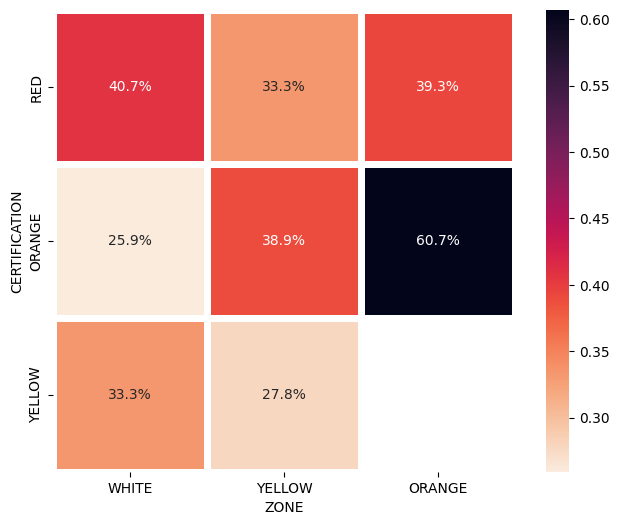

In [192]:
heatmap_data = state_seen_df.pivot(index='CERTIFICATION', columns='ZONE', values='Percentuale')

zones_order = ['WHITE', 'YELLOW', 'ORANGE']
certifications_order = ['RED', 'ORANGE', 'YELLOW']

heatmap_data = heatmap_data.loc[certifications_order, zones_order]

#heatmap_data = heatmap_data.transpose()

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(heatmap_data,
            linewidth = 5,
            annot=True,
            cmap='rocket_r',
            cbar = True,
            fmt='.1%',
            square=True)

plt.show()